In [1]:
from algorithm import *

### Question 1

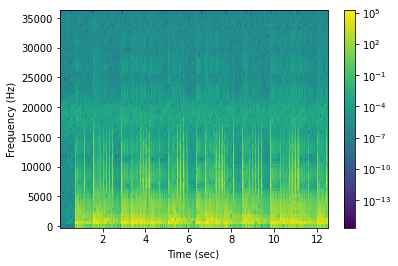

In [2]:
if __name__ == '__main__':

    encoder = Encoding()
    fs, s = read('./samples/Late truth - Audio Hertz.wav')
    encoder.process(fs, s[:900000])
    encoder.display_spectrogram(display_anchors=False)

In [3]:
f, t, Sxx = encoder.spectro

Sxx = Sxx.flatten()

Sxx.sort()
total_energy = float(sum(Sxx))
energy, i = 0., 1
while energy/total_energy < 0.9:
    energy += float(Sxx[-i])
    i += 1
print(f"Il faut {i} coefficients, sur {np.size(Sxx)} soit {100*(i/np.size(Sxx))}%.")


Il faut 9162 coefficients, sur 609310 soit 1.5036680835699396%.


On observe que l'énergie n'est pas répartie de façon uniforme, mais qu'elle est concentrée dans les basses fréqences (je n'arrive pas à afficher colorbar). Par ailleurs, il ne faut en réalité que 1,5% des coefficients pour avoir 90% de l'énergie du signal.

### Question 2

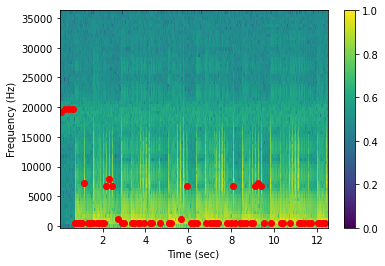

Number of maximums : 136


In [4]:
encoder.display_spectrogram(display_anchors=True)
print(f"Number of maximums : {np.size(encoder.anchors)}")

Lorsque l'on s'intéresse au nombre de maxima, on arrive a une centaine pour un paramètre de 50 en entrée de la fonction peak_local_max. 

### Question 3

Dans le hash il n'y a que la différence de temps entre la cible et l'ancre, ainsi le hash est invariant pas translation, on peut trouver un extrait même s'il n'a pas la même origine que le son original.

### Question 4

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import read
from algorithm import *
import scipy.signal


# ----------------------------------------------
# Run the script
# ----------------------------------------------
if __name__ == '__main__':

    folder = './samples/'

    # 1: Load the audio files
    import os
    audiofiles = os.listdir(folder)
    audiofiles = [item for item in audiofiles if item[-4:] =='.wav']

    # 2: Set the parameters of the encoder
    size = 128
    noverlap = 32

    # 3: Construct the database
    database = []
    
    for name in audiofiles:
        fingerprint = Encoding()
        fs, s = read('./samples/' + name)
        fingerprint.process(fs, s)
        hashes = fingerprint.hashes
        database.append({'song': name, 'hashcodes': hashes})

    # 4: Save the database
    with open('songs.pickle', 'wb') as handle:
        pickle.dump(database, handle, protocol=pickle.HIGHEST_PROTOCOL)

Ou alors on peut juste dire d'aller voir le fichier database.py ...

### Question 5/6

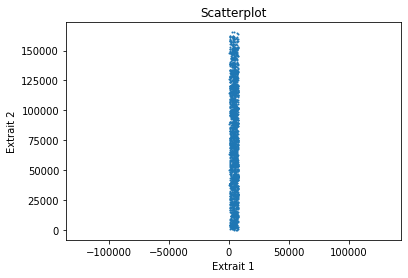

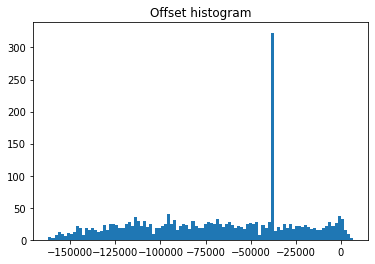

(array([  4.,   3.,   8.,  12.,   9.,   6.,  11.,   9.,  12.,  21.,  18.,
          8.,  18.,  15.,  19.,  16.,  12.,  13.,  23.,  15.,  24.,  25.,
         23.,  19.,  19.,  25.,  28.,  21.,  35.,  30.,  22.,  29.,  20.,
         25.,   9.,  18.,  18.,  22.,  24.,  40.,  25.,  31.,  16.,  22.,
         24.,  23.,  17.,  29.,  21.,  19.,  18.,  25.,  28.,  26.,  25.,
         33.,  24.,  20.,  25.,  28.,  23.,  19.,  22.,  20.,  17.,  24.,
         26.,  25.,  27.,   8.,  23.,  18.,  27., 323.,  14.,  20.,  16.,
         25.,  19.,  25.,  17.,  21.,  21.,  20.,  23.,  20.,  17.,  18.,
         15.,  16.,  19.,  21.,  27.,  21.,  26.,  37.,  33.,  16.,   9.,
          3.]),
 array([-1.6219400e+05, -1.6050481e+05, -1.5881562e+05, -1.5712643e+05,
        -1.5543724e+05, -1.5374805e+05, -1.5205886e+05, -1.5036967e+05,
        -1.4868048e+05, -1.4699129e+05, -1.4530210e+05, -1.4361291e+05,
        -1.4192372e+05, -1.4023453e+05, -1.3854534e+05, -1.3685615e+05,
        -1.3516696e+05, -1.334

In [6]:
#Exemple lorsque l'extrait correspond au morceau 

encoder = Encoding()
tmin = int(50*fs) # We select an extract starting at 50s ...
duration = int(10*fs) # ... which lasts 10s
fs, s = read('./samples/Frisk - Au.Ra.wav')
encoder.process(fs, s[tmin:tmin + duration])
hashes1 = encoder.hashes
encoder.process(fs, s)
hashes2 = encoder.hashes

match = Matching(hashes1, hashes2)
match.display_scatterplot()
match.display_histogram();


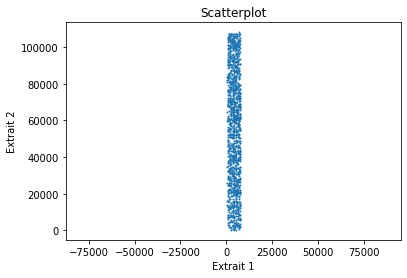

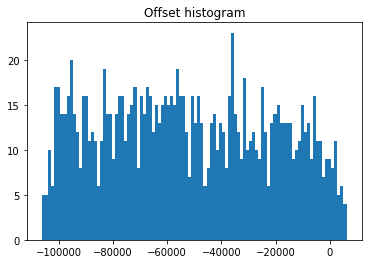

In [9]:
#Exemple lorsque l'extrait correspond au morceau 

encoder = Encoding()
tmin = int(50*fs) # We select an extract starting at 50s ...
duration = int(10*fs) # ... which lasts 10s
fs, s = read('./samples/Frisk - Au.Ra.wav')
encoder.process(fs, s[tmin:tmin + duration])
hashes1 = encoder.hashes
fs, s = read('samples\Open Highway - ALBIS.wav')
encoder.process(fs, s)
hashes2 = encoder.hashes

match = Matching(hashes1, hashes2)
match.display_scatterplot()
match.display_histogram();


### Question 7/8

Selected song: Lucid Haze - Amulets
Trial song: Cash Machine - Anno Domini Beats


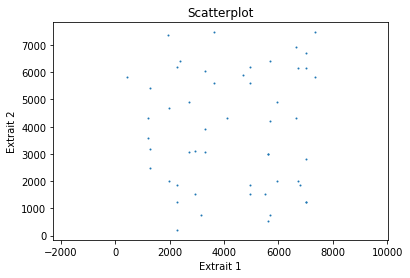

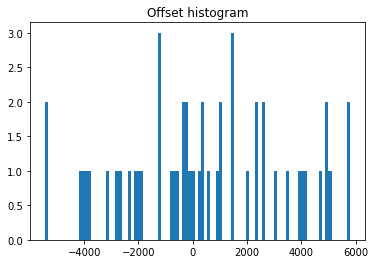

Trial song: Dark Alley Deals - Aaron Kenny


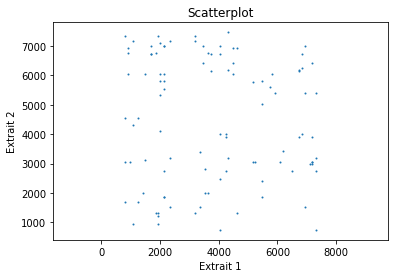

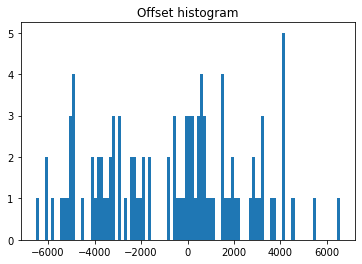

Trial song: Frisk - Au.Ra


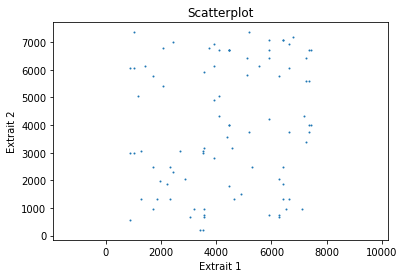

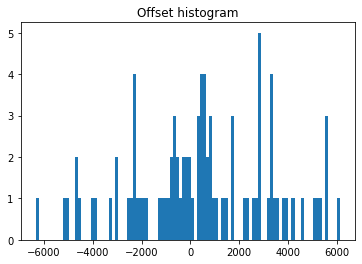

Trial song: In The Throes - Asher Fulero


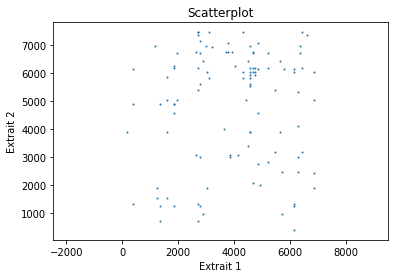

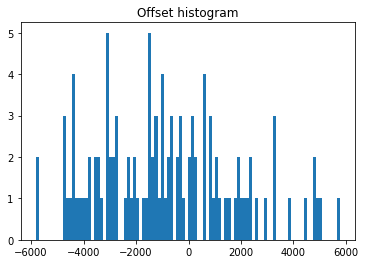

Trial song: Jal - Edge of Water - Aakash Gandhi


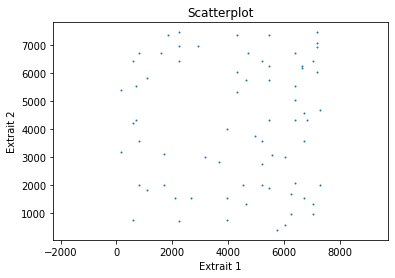

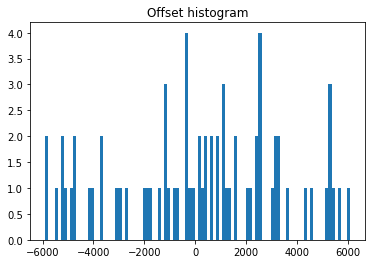

Trial song: Late Truth - Audio Hertz


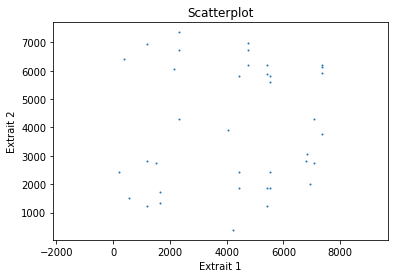

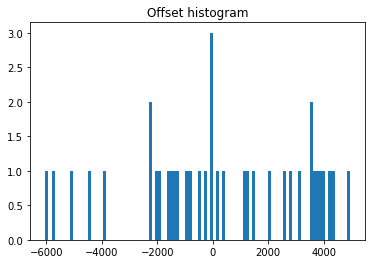

Trial song: Lightfoot - Aaron Lieberman


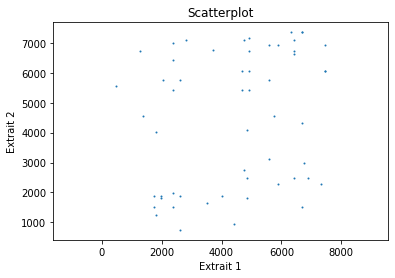

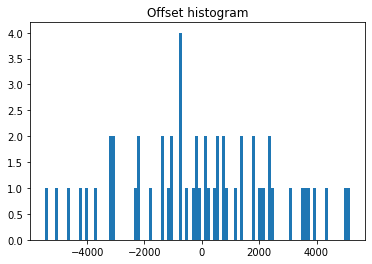

Trial song: Lucid Haze - Amulets


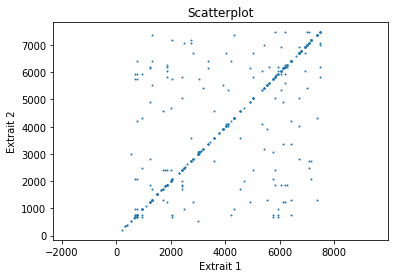

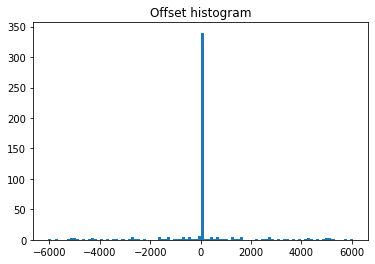

The song isLucid Haze - Amulets


In [10]:
"""
Description
"""
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import read
from algorithm import *

# ----------------------------------------------
# Run the script
# ----------------------------------------------
if __name__ == '__main__':

    # 1: Load the database
    with open('songs.pickle', 'rb') as handle:
        database = pickle.load(handle)

    # 2: Create an instance of the class Encoder

    encoder = Encoding()

    # 3: Randomly get an extract from one of the songs of the database

    songs = [item for item in os.listdir('./samples') if item[:-4] != '.wav']
    song = random.choice(songs)
    print('Selected song: ' + song[:-4])
    filename = './samples/' + song

    fs, s = read(filename)
    tmin = int(50*fs) # We select an extract starting at 50s ...
    duration = int(10*fs) # ... which lasts 10s

    # 4: Use the encoder to extract a fingerprint of the sample

    encoder.process(fs, s[tmin:tmin + duration])
    hashes1 = encoder.hashes

    # 5: Using the class Matching, compare the fingerprint to all the 
    # fingerprints in the database

    for song in songs:

        print('Trial song: ' + song[:-4])
        filename = './samples/' + song
        fs, s = read(filename)

        encoder.process(fs, s[tmin:tmin + duration])
        hashes2 = encoder.hashes

        match = Matching(hashes2, hashes1)
        match.display_scatterplot()
        hist = match.display_histogram()
        if np.max(hist[0]) >= 150:
            print('The song is ' + song[:-4])
            break

    
